<a href="https://colab.research.google.com/github/sanjuraj-c/Language-detection-model/blob/main/projectlanguage_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:

df = pd.read_csv("/content/Language Detection.csv")

In [ ]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
# Value cout of each language
df['Language'].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


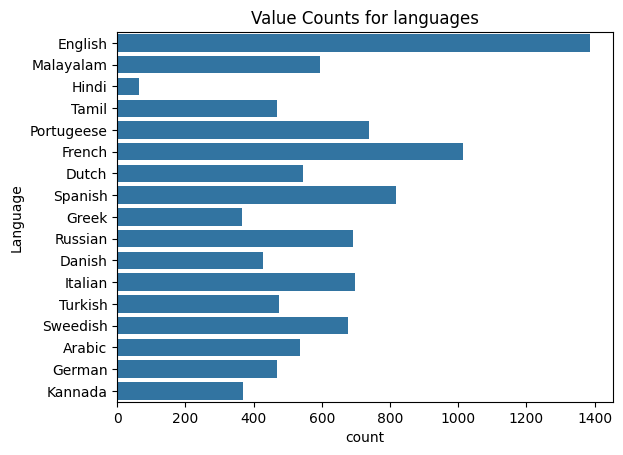

In [ ]:
# contplot for Language columns
sns.countplot(y=df['Language'])
plt.title('Value Counts for languages')

plt.show()


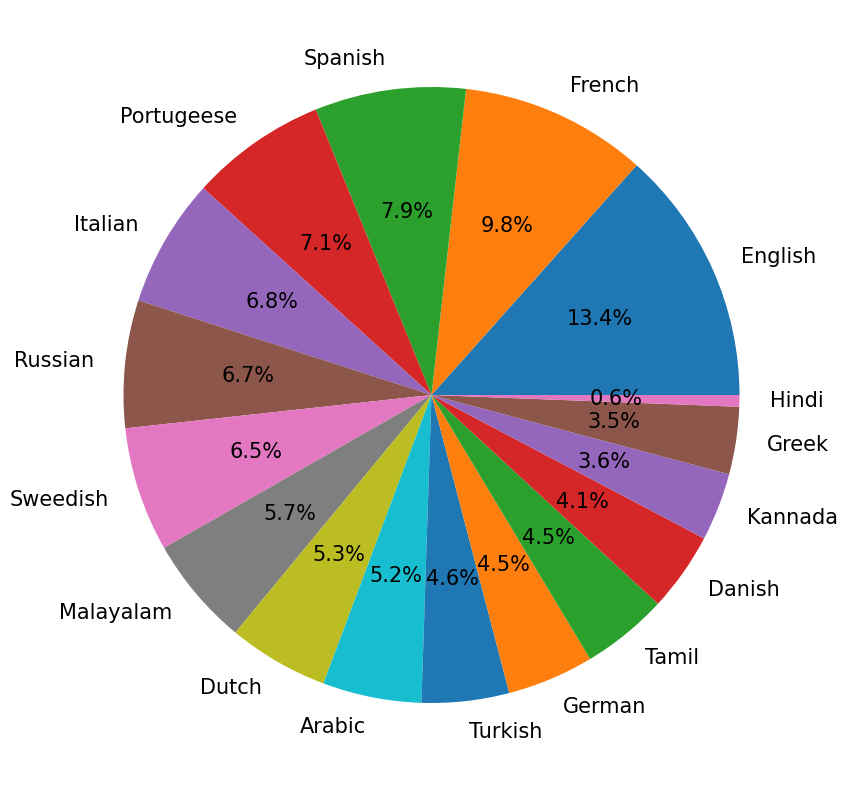

In [ ]:
language = df["Language"].value_counts().reset_index()
language.columns = ['Language', 'Count']  # Rename the columns for clarity

plt.figure(figsize=(10,10))
labels = language['Language']

plt.pie(language["Count"], labels=labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()


In [ ]:
X = df['Text']
y = df['Language']

# Label Encoding
Converting categorical variables to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Text Processing

In [ ]:
import re     # regular expression
df_list = []
for Text in X:
    Text = re.sub(r'[!@#$(),\n"%^&*:;~0-9]', ' ',Text)
    Text = re.sub('[[]]',' ',Text)
    Text = Text.lower()
    df_list.append(Text)

<ipython-input-13-545e43d8550e>:5: FutureWarning: Possible nested set at position 1
  Text = re.sub('[[]]',' ',Text)


# Bag of Words

In [ ]:
# Creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_list).toarray()

In [ ]:
X.shape

(10337, 39404)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

# Model creation and Prediction

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
# Prediction
y_pred = model.predict(x_test)

# Prediction

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [ ]:
print("Accuracy is :",ac)

Accuracy is : 0.9835589941972921


In [ ]:
accuracy_score(y_test,y_pred)

0.9835589941972921

In [ ]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       1.00      0.95      0.97        78
           2       0.99      0.99      0.99       107
           3       0.92      1.00      0.96       278
           4       0.99      0.99      0.99       199
           5       1.00      0.98      0.99        83
           6       1.00      0.99      0.99        82
           7       1.00      1.00      1.00         9
           8       0.98      0.99      0.99       129
           9       1.00      0.96      0.98        78
          10       0.99      1.00      1.00       122
          11       0.99      0.99      0.99       148
          12       0.99      0.99      0.99       137
          13       0.99      0.95      0.97       173
          14       0.99      0.99      0.99       126
          15       1.00      0.99      0.99        95
          16       1.00      0.94      0.97       102

    accuracy              

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(x_train, y_train)

In [ ]:
y_predsv=svm.predict(x_test)